<a href="https://colab.research.google.com/github/swapnilbarai/CrackDetection/blob/master/Segmentationcrackdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
def Conv3(in_c,out_c):
  Conv=nn.Sequential(nn.Conv2d(in_c,out_c,kernel_size=3,stride=1,padding=1),
                     nn.LeakyReLU(inplace=True),
                     nn.BatchNorm2d(out_c),
                     nn.Conv2d(out_c,out_c,kernel_size=3,stride=1,padding=1),
                     nn.LeakyReLU(inplace=True),
                     nn.BatchNorm2d(out_c)
                     )
  return Conv

In [2]:
class Unet(nn.Module):
  def __init__(self):
    super(Unet,self).__init__()
    self.MaxPoll1=nn.MaxPool2d(kernel_size=2,stride=2,padding=0)
    self.down_conv1=Conv3(3,32)
    self.down_conv2=Conv3(32,64)
    self.down_conv3=Conv3(64,128)
    self.down_conv4=Conv3(128,256)
    self.down_conv5=Conv3(256,512)
    self.ConvTraspose1=nn.ConvTranspose2d(512,256,kernel_size=2,stride=2,padding=0)
    self.up_sample1=Conv3(512,256)
    self.ConvTraspose2=nn.ConvTranspose2d(256,128,kernel_size=2,stride=2,padding=0)
    self.up_sample2=Conv3(256,128)
    self.ConvTraspose3=nn.ConvTranspose2d(128,64,kernel_size=2,stride=2,padding=0)
    self.up_sample3=Conv3(128,64)
    self.ConvTraspose4=nn.ConvTranspose2d(64,32,kernel_size=2,stride=2,padding=0)
    self.up_sample4=Conv3(64,32)
    self.out_con2d=nn.Conv2d(32,1,kernel_size=1,stride=1,padding=0)
  def forward(self,inputs):
    x1=self.down_conv1(inputs)
    x2=self.MaxPoll1(x1)
    x3=self.down_conv2(x2)
    x4=self.MaxPoll1(x3)
    x5=self.down_conv3(x4)
    x6=self.MaxPoll1(x5)
    x7=self.down_conv4(x6)
    x8=self.MaxPoll1(x7)
    x9=self.down_conv5(x8)
    x10=self.ConvTraspose1(x9)
    #print(x7.shape,x10.shape)
    x=torch.cat([x7,x10],1)
    #print(x.shape)
    x11=self.up_sample1(x)
    x12=self.ConvTraspose2(x11)
    x13=self.up_sample2(torch.cat([x12,x5],1))
    x14=self.ConvTraspose3(x13)
    x15=self.up_sample3(torch.cat([x14,x3],1))
    x16=self.ConvTraspose4(x15)
    x17=self.up_sample4(torch.cat([x16,x1],1))
    outputs=torch.sigmoid(self.out_con2d(x17))
    return outputs


In [3]:
#inputs=torch.rand((16,3,256,256))
net=Unet()
'''
output=net(inputs)
print(output)
'''

'\noutput=net(inputs)\nprint(output)\n'

In [195]:
def f_score(predicted_img,target_img,ep=1e-5):
  tp=torch.sum(predicted_img*target_img)
  deno=torch.sum(target_img)+torch.sum(predicted_img)
  return (2.0*tp)/(deno+ep)

class DiceLoss(nn.Module):
  def __init__(self):
    super(DiceLoss,self).__init__()
    self.bce = nn.BCELoss(reduction='mean')
  def forward(self,pre_img,tar_img):
    bce_loss=self.bce(pre_img,tar_img)
    dice_loss=1-f_score(pre_img,tar_img)
    return bce_loss+5*dice_loss

In [ ]:
loss=DiceLoss()
inputs=torch.rand((16,1,256,256))
loss_out=loss(output,inputs)
print(loss_out)

tensor(1.4369, grad_fn=<AddBackward0>)


In [5]:
!unzip "/content/drive/MyDrive/archive (1).zip" -d "/home/"

Streaming output truncated to the last 5000 lines.
  inflating: /home/crack_segmentation_dataset/train/masks/Rissbilder_for_Florian_9S6A2827_1672_43_3463_3133.jpg  
  inflating: /home/crack_segmentation_dataset/train/masks/Rissbilder_for_Florian_9S6A2827_1769_76_2872_3754.jpg  
  inflating: /home/crack_segmentation_dataset/train/masks/Rissbilder_for_Florian_9S6A2827_2156_467_3481_3232.jpg  
  inflating: /home/crack_segmentation_dataset/train/masks/Rissbilder_for_Florian_9S6A2827_2215_554_3226_3035.jpg  
  inflating: /home/crack_segmentation_dataset/train/masks/Rissbilder_for_Florian_9S6A2827_2427_389_2516_2743.jpg  
  inflating: /home/crack_segmentation_dataset/train/masks/Rissbilder_for_Florian_9S6A2827_2998_282_2659_3414.jpg  
  inflating: /home/crack_segmentation_dataset/train/masks/Rissbilder_for_Florian_9S6A2827_315_10_3098_3166.jpg  
  inflating: /home/crack_segmentation_dataset/train/masks/Rissbilder_for_Florian_9S6A2827_369_583_3066_3082.jpg  
  inflating: /home/crack_segmentat

In [6]:
mask_Path='/home/crack_segmentation_dataset/masks/CFD_002.jpg'
import cv2
import numpy as np
img=cv2.imread(mask_Path,0)
print(img.shape)


ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#print(thresh1)
y = np.expand_dims(thresh1, axis=0)
x=np.unique(thresh1)
print(y.shape)
'''
import matplotlib.pyplot as plt
plt.imshow(thresh1)
'''


(448, 448)
(1, 448, 448)


'\nimport matplotlib.pyplot as plt\nplt.imshow(thresh1)\n'

In [7]:
import os
train_mask=sorted(os.listdir('/home/crack_segmentation_dataset/train/masks'))
train_images=sorted(os.listdir('/home/crack_segmentation_dataset/train/images'))
print(len(train_mask),len(train_images))
train_mask=np.array(train_mask)
train_images=np.array(train_images)
x=(train_images==train_mask)
print(len(x))
train_images=set(train_images)
cnt=0
for img in train_mask:
  if img not in train_images:
    cnt=cnt+1
print(cnt)


9603 9603
9603
0


In [8]:
train_data=[]
for img in train_mask:
  maskpath=os.path.join('/home/crack_segmentation_dataset/train/masks',img)
  imagepath=os.path.join('/home/crack_segmentation_dataset/train/images',img)
  train_data.append((imagepath,maskpath))
print(len(train_data))


9603


In [9]:
import pandas as pd
train_data = pd.DataFrame(train_data, columns=["Images","Masks"])
print(train_data.head())

                                              Images                                              Masks
0  /home/crack_segmentation_dataset/train/images/...  /home/crack_segmentation_dataset/train/masks/C...
1  /home/crack_segmentation_dataset/train/images/...  /home/crack_segmentation_dataset/train/masks/C...
2  /home/crack_segmentation_dataset/train/images/...  /home/crack_segmentation_dataset/train/masks/C...
3  /home/crack_segmentation_dataset/train/images/...  /home/crack_segmentation_dataset/train/masks/C...
4  /home/crack_segmentation_dataset/train/images/...  /home/crack_segmentation_dataset/train/masks/C...


In [216]:
test_data=[('/home/crack_segmentation_dataset/test/images/CFD_070.jpg','/home/crack_segmentation_dataset/test/masks/CFD_070.jpg')]
test_df=pd.DataFrame(test_data, columns=["Images","Masks"])

In [186]:
import torch
import torch.nn as nn 
from torch.utils.data import Dataset,DataLoader
import albumentations as A
from albumentations.pytorch.transforms import ToTensor
import torch.nn.functional as F

class PreproseConcreteData(Dataset):
  def __init__(self,train_data,transforms=None,IsTest=False):
    self.train=train_data
    self.transforms=transforms
    self.IsTest=IsTest
  def __len__(self):
    return self.train.shape[0]
  def __getitem__(self,idx):
    Image=cv2.imread(self.train.iloc[idx]['Images'])
    Image=cv2.resize(Image,(256,256))
    if not self.IsTest:
      Mask=cv2.imread(self.train.iloc[idx]['Masks'],0)
      Mask=cv2.resize(Mask,(256,256))
      ret,Mask = cv2.threshold(Mask,127,1,cv2.THRESH_BINARY)
      Mask=np.expand_dims(Mask, axis=0)
    if self.transforms:
      Image = self.transforms(**{"image": np.array(Image)})["image"]
    if self.IsTest:
      return Image
    Mask=torch.tensor(Mask,dtype=torch.float32)

    return Image,Mask








In [187]:
imagenet_stats = {'mean':[0.485, 0.456, 0.406], 'std':[0.229, 0.224, 0.225]}
train_tfms = A.Compose([
        ToTensor(normalize=imagenet_stats)
        ])


In [217]:
train_ds = PreproseConcreteData(train_data, transforms=train_tfms)
test_ds=PreproseConcreteData(test_df, transforms=train_tfms)
print(len(train_ds))

9603


In [218]:
train_dl = DataLoader(train_ds, batch_size=16, shuffle=True, 
                      num_workers=3, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=16, shuffle=True, 
                      num_workers=3, pin_memory=True)

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [198]:
import torch.optim as optim
opt = optim.Adam(net.parameters(),lr=1e-5)
loss_fn=DiceLoss()
net=net.to(device)
Training_loss=[]

for x in range(2):
    training_loss=0.0
    net.train()
    i=0
    for inputs,targets in train_dl:
        inputs=inputs.to(device)
        targets=targets.to(device)
        opt.zero_grad()
        outputs=net(inputs)
        #preds = torch.argmax(outputs,dim=1)
        #print(outputs.shape,targets.shape)
        loss=loss_fn(outputs,targets)
        loss.backward()
        opt.step()
        training_loss += loss.data.item() * inputs.size(0) 
        if i%100==0:
          print('hello')
        i=i+1
    training_loss/=len(train_dl)
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f}'.format(x+1,30,training_loss))
    Training_loss.append(training_loss)
    
    
    


hello
hello
hello
hello
hello
hello
hello
Epoch 1/30 : Training loss: 45.2232
hello
hello
hello
hello
hello
hello
hello
Epoch 2/30 : Training loss: 43.8711


Text(0, 0.5, 'Training_loss')

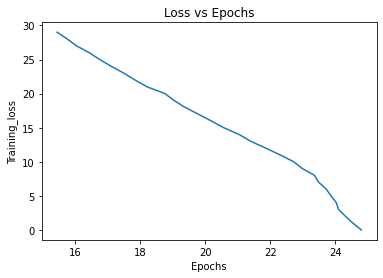

In [121]:
plt.plot(Training_loss,range(30))
plt.title("Loss vs Epochs")
plt.xlabel('Epochs')
plt.ylabel('Training_loss')

In [219]:

net.eval()
for inputs,targets in test_dl:
  inputs=inputs.to(device)
  targets=targets.to(device)
  outputs=net(inputs)

In [220]:
#outputs=outputs.squeeze()
#outputs=outputs.unsqueeze(dim=0)
print(outputs)
out=torch.argmax(outputs,dim=1)

print(torch.unique(out))

tensor([[[[0.0732, 0.0145, 0.0137,  ..., 0.0133, 0.0132, 0.0831],
          [0.0141, 0.0133, 0.0117,  ..., 0.0119, 0.0108, 0.0135],
          [0.0129, 0.0130, 0.0118,  ..., 0.0135, 0.0123, 0.0138],
          ...,
          [0.0122, 0.0123, 0.0130,  ..., 0.0134, 0.0130, 0.0144],
          [0.0130, 0.0119, 0.0129,  ..., 0.0123, 0.0122, 0.0146],
          [0.0582, 0.0132, 0.0134,  ..., 0.0143, 0.0143, 0.0826]]]],
       device='cuda:0', grad_fn=<SigmoidBackward>)
tensor([0], device='cuda:0')


torch.Size([256, 256])


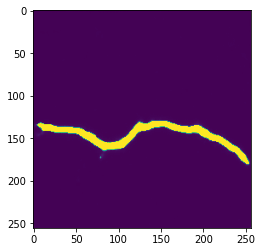

In [221]:
import matplotlib.pyplot as plt
out=outputs.squeeze()
img=np.array(out.to('cpu').detach()*255.0)
print(out.shape)
ret,out = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(out)
plt.imshow(img)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')


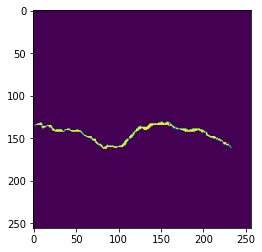

In [222]:
targets=targets.squeeze()
print(targets*255)
plt.imshow(targets.to('cpu').detach()*255)


In [71]:
checkpoints={'model':Unet(),'model_state_dict':net.state_dict()}
torch.save(checkpoints,'/content/drive/MyDrive/Unet.pth')

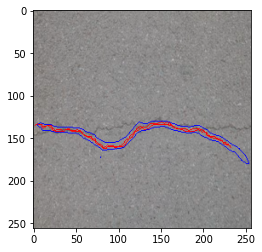

In [223]:
import matplotlib.pyplot as plt
image=cv2.imread('/home/crack_segmentation_dataset/test/images/CFD_014.jpg')
#targets=cv2.imread('/home/crack_segmentation_dataset/test/masks/CFD_001.jpg')
image=cv2.resize(image,(256,256))
_, thresh_gt = cv2.threshold(np.array(targets.to('cpu').detach()*255.0), 127, 255, cv2.THRESH_BINARY)
_, thresh_p = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
thresh_gt=thresh_gt.astype(np.uint8)
thresh_p=thresh_p.astype(np.uint8)

contours_gt, _ = cv2.findContours(thresh_gt, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours_p, _ = cv2.findContours(thresh_p, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
overlap_img = cv2.drawContours(image, contours_gt, -1, (255, 0, 0), 1)
overlap_img = cv2.drawContours(image, contours_p, -1, (0,0,255), 1)
  
plt.imshow(image)

torch.Size([256, 256])
(256, 256, 3)


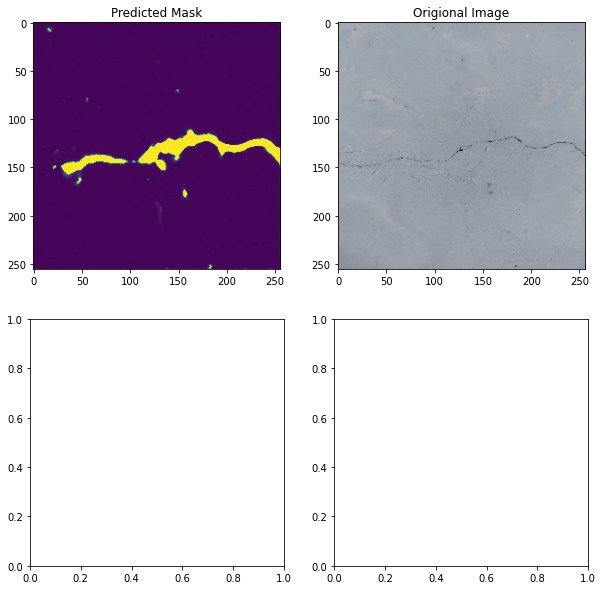

In [201]:
path='/content/drive/MyDrive/TestingConcrete/Positive/IMG_20210130_100414.jpg'
te_data=[(path,path)]
te_df=pd.DataFrame(te_data, columns=["Images","Masks"])

te_ds=PreproseConcreteData(te_df, transforms=train_tfms,IsTest=True)
te_dl = DataLoader(te_ds, batch_size=16, shuffle=True, 
                      num_workers=3, pin_memory=True)
for inputs in te_dl:
  inputs=inputs.to(device)
  outputs=net(inputs)
outputs=outputs.squeeze()
print(outputs.size())
pred=np.array(outputs.to('cpu').detach()*255.0,dtype=np.uint8)
org=cv2.imread(path)
org=cv2.resize(org,(256,256))
print(org.shape)
fig, ax = plt.subplots(nrows=2,  ncols=2, figsize=(10, 10))
ax[0,0].imshow(pred)
ax[0,0].set_title("Predicted Mask")
ax[0,1].imshow(org)
ax[0,1].set_title("Origional Image")
plt.show()
